# Google Playstore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# mastiin apakah ada NAN apa nggak

df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Cleaning & Modifying Type (paid / free) Column

In [6]:
# we can see the dataframe based on Type column

df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [7]:
# to drop all NaN values in our dataframe

df = df.dropna()

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [10]:
# we can see that we have 2 types (FREE & PAID)

df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [11]:
# this is a way to create and expand the type column into "free" and "paid" columns

for elem in df['Type'].unique():
    df[str(elem)] = df['Type'] == elem

### CATEGORY

In [12]:
# we have 33 Categories in Category column

# distinct_category = df.drop_duplicates(['Category'])
# distinct_category = pd.DataFrame(distinct_category['Category'])
# distinct_category['Category'].count()   #33
# pd.DataFrame(distinct_category['Category'])

df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [13]:
# this is a way to create and expand the Category column as same as Type column like we did before

for elem in df['Category'].unique():
    df[str(elem)] = df['Category'] == elem

In [14]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Free', 'Paid', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES',
       'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype='object')

### CONTENT RATING 

In [15]:
# we have 6 values in Content rating column
# and this is another way to see in a different way, because I made this column first to distinct
# the values in the dataframe, so we can see what values we got in Content Rating column here

distinct_content_rating = df.drop_duplicates(['Content Rating'])
# distinct_content_rating['Content Rating'].count()   #6
pd.DataFrame(distinct_content_rating['Content Rating'])  

,Content Rating
0,Everyone
3,Teen
22,Everyone 10+
133,Mature 17+
298,Adults only 18+
8266,Unrated


In [16]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,SPORTS,TRAVEL_AND_LOCAL,TOOLS,PERSONALIZATION,PRODUCTIVITY,PARENTING,WEATHER,VIDEO_PLAYERS,NEWS_AND_MAGAZINES,MAPS_AND_NAVIGATION
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,False,False,False,False,False,False,False,False,False,False


### PRICE  (usd atau $)

In [17]:
# this is a way to change the values in Price column, for example from "$5" become "5" 

df.Price = df.Price.apply(lambda x: x.replace('$', ''))

df.Price = df.Price.astype('float')

### REVIEWS

In [18]:
# this is a way to change the type of Price column from object become int

df.Reviews = df.Reviews.astype('int')
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int32

### LAST UPDATED

In [19]:
# This is a way to change the Last Updated column from object type become datetime type

from datetime import datetime

df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9360, dtype: datetime64[ns]

### INSTALLS

In [20]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [21]:
# this is a way to change the values in Installs column, for example from "10,000+" become "10000" 

df.Installs = df.Installs.apply(lambda x : x.replace(',', ''))
df.Installs = df.Installs.apply(lambda x: x.replace('+', ''))
df.Installs = df.Installs.apply(lambda x: int(x))

In [22]:
df.Installs.info()

<class 'pandas.core.series.Series'>
Int64Index: 9360 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
9360 non-null   int64
dtypes: int64(1)
memory usage: 146.2 KB


In [23]:
# to check the entire of dataframe columns 
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Free', 'Paid', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES',
       'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype='object')

In [24]:
# this is a way to change several columns from object types become a category type

cat = ['App', 'Category', 'Type',
       'Content Rating', 'Genres']

for var in cat:
    df[cat] = df[cat].astype('category')
    
df.dtypes

App                          category
Category                     category
Rating                        float64
Reviews                         int32
Size                           object
Installs                        int64
Type                         category
Price                         float64
Content Rating               category
Genres                       category
Last Updated           datetime64[ns]
Current Ver                    object
Android Ver                    object
Free                             bool
Paid                             bool
ART_AND_DESIGN                   bool
AUTO_AND_VEHICLES                bool
BEAUTY                           bool
BOOKS_AND_REFERENCE              bool
BUSINESS                         bool
COMICS                           bool
COMMUNICATION                    bool
DATING                           bool
EDUCATION                        bool
ENTERTAINMENT                    bool
EVENTS                           bool
FINANCE     

### SIZE

In [25]:
# this is a way to change the values in Size column, for example from "15k" become "15" 
# and we need to convert all the "Variaes with device" values to be a "NaN" value

df.Size = df.Size.apply(lambda x : x.replace('M', ''))
df.Size = df.Size.apply(lambda x : x.replace('k', ''))
df.Size = df.Size.apply(lambda x: x.replace('Varies with device', 'NaN'))
df.Size = df.Size.apply(lambda x: float(x))
df.Size.info()

df['Size']

<class 'pandas.core.series.Series'>
Int64Index: 9360 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
7723 non-null   float64
dtypes: float64(1)
memory usage: 146.2 KB


0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     NaN
10840    19.0
Name: Size, Length: 9360, dtype: float64

In [26]:
# First of all, we need to find the mean of this column, and then keep the mean value 
# in "meansize" variable, finally fill or change all the "NaN" values become the mean value

df['Size'].isna().sum()
# df.Size.dropna()
df.Size = df.Size.fillna(0)
meansize = df.Size.mean()
df.Size = df.Size.fillna(meansize)
df.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     0.0
10840    19.0
Name: Size, Length: 9360, dtype: float64

# Visualization 

In [27]:
# remove some columns that are not too important

df = df.drop(['Current Ver', 'Android Ver'], axis=1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,SPORTS,TRAVEL_AND_LOCAL,TOOLS,PERSONALIZATION,PRODUCTIVITY,PARENTING,WEATHER,VIDEO_PLAYERS,NEWS_AND_MAGAZINES,MAPS_AND_NAVIGATION
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# this is a way to create and expand the Content Rating column,
# as same as some columns like we did before

# df['Content Rating'] = df['Content Rating'].map({'Everyone':1, 'Teen':2, 
#                                     'Everyone 10+':3, 'Mature 17+':4,
#                                     'Adults only 18+': 5, 'Unrated':0})

for elem in df['Content Rating'].unique():
    df[str(elem)] = df['Content Rating'] == elem
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,WEATHER,VIDEO_PLAYERS,NEWS_AND_MAGAZINES,MAPS_AND_NAVIGATION,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,True,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,True,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,True,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,...,False,False,False,False,False,True,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,False,False,False,False,True,False,False,False,False,False


In [29]:
# let's see the temporary of our dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  9360 non-null   category      
 1   Category             9360 non-null   category      
 2   Rating               9360 non-null   float64       
 3   Reviews              9360 non-null   int32         
 4   Size                 9360 non-null   float64       
 5   Installs             9360 non-null   int64         
 6   Type                 9360 non-null   category      
 7   Price                9360 non-null   float64       
 8   Content Rating       9360 non-null   category      
 9   Genres               9360 non-null   category      
 10  Last Updated         9360 non-null   datetime64[ns]
 11  Free                 9360 non-null   bool          
 12  Paid                 9360 non-null   bool          
 13  ART_AND_DESIGN       9360 non-nu

Text(0.5, 1.0, 'Type (paid or free) across rating')

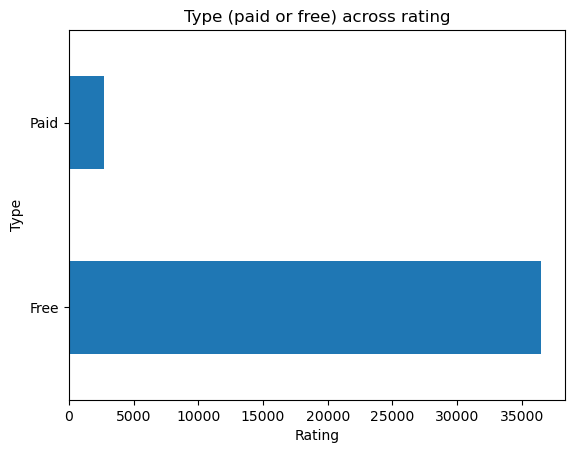

In [30]:
# Visualization of Type "paid or free" across Rating
# the "free" Type has the most Rating than the "paid"

tipe_rating = df.groupby(['Type']).sum()['Rating']
tipe_rating.plot(kind='barh')
plt.ylabel('Type')
plt.xlabel('Rating')
plt.title('Type (paid or free) across rating')

Text(0.5, 1.0, 'Type (paid or free) across Installers')

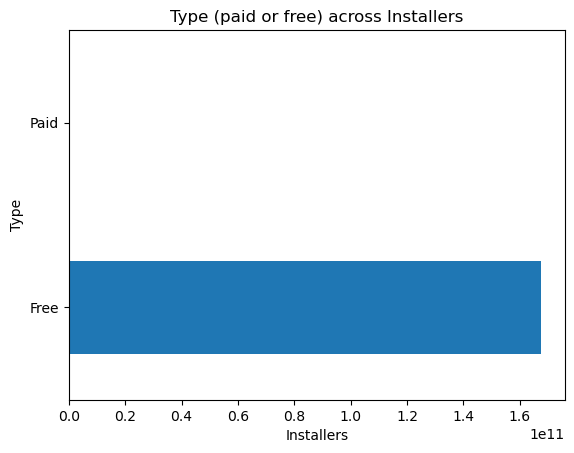

In [31]:
# Visualization of Type "paid or free" across Installers
# the "free" Type has the most installers than the "paid"

tipe_install = df.groupby(['Type']).sum()['Installs']
tipe_install.plot(kind='barh')
plt.ylabel('Type')
plt.xlabel('Installers')
plt.title('Type (paid or free) across Installers')


Text(0.5, 1.0, 'type (paid or free) across reviewers')

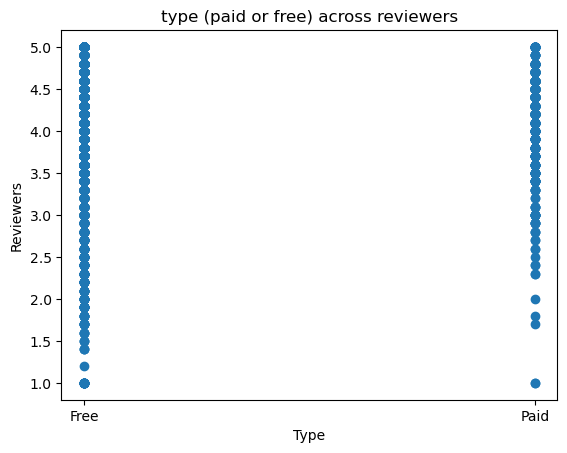

In [32]:
# typereviews = df.groupby(['Type']).sum()['Reviews']
plt.scatter(df['Type'], df['Rating'])
plt.xlabel('Type')
plt.ylabel('Reviewers')
plt.title('type (paid or free) across rating')

Text(0.5, 1.0, 'type (paid or free) across reviewers')

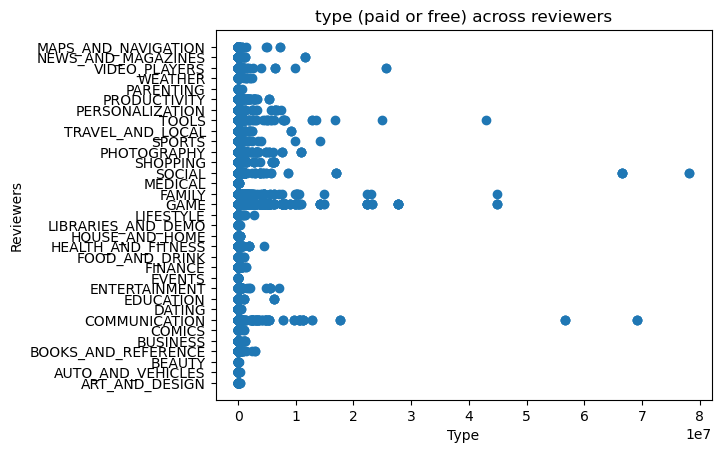

In [33]:
# Visualization of the Category column across Reviews

# category_reviews = df.groupby(['Category']).sum()['Reviews'].sort_values(ascending=True)
# category_reviews.plot(kind='barh')
# plt.ylabel('category')
# plt.xlabel('Reviews')
# plt.title('app category across reviewers')

plt.scatter(df['Reviews'], df['Category'])
plt.xlabel('Reviews')
plt.ylabel('Category')
plt.title('Category across reviewers')

Text(0.5, 1.0, 'application category across total rating')

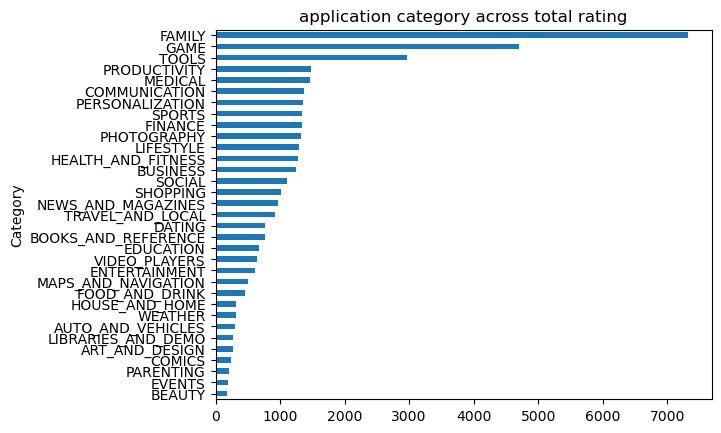

In [34]:
# Visualization of the Category column across Rating
# family, game and tools had ranked as the most Rating than others

category_rating = df.groupby(['Category']).sum()['Rating'].sort_values(ascending=True)
category_rating.plot(kind='barh')
plt.ylabel('Category')
plt.title('application category across total rating')

Text(0.5, 1.0, 'category across total installs')

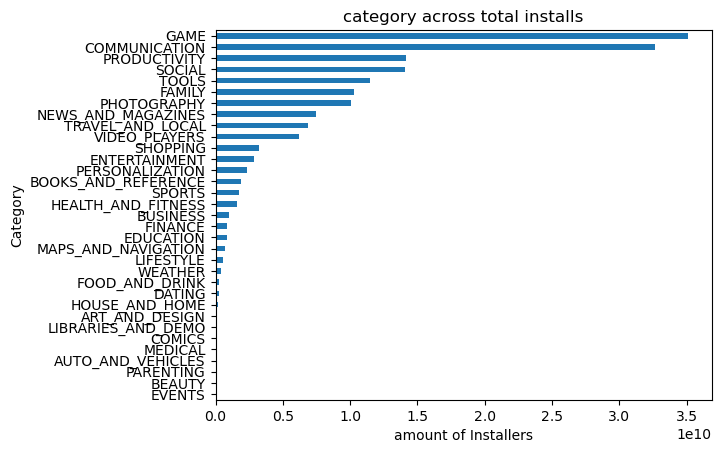

In [35]:
# визуализация category mana yg install nya tinggi

category_installs = df.groupby(['Category']).sum()['Installs'].sort_values(ascending=True)
category_installs.plot(kind='barh')
plt.ylabel('Category')
plt.xlabel('amount of Installers')
plt.title('category across total installs')

In [39]:
df['Content Rating'].unique()

['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+', 'Unrated']
Categories (6, object): ['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Unrated']

# Build the model of machine learning

Here are below what methods that I used as the model:
- Linear Regression;
- KNN Neighbors Regressor;
- Gradient Boosting Regressor;
- Decision Tree;
- Neural Network MLPRegressor;
- and Tensorflow & Keras in my VSCode

In [40]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,WEATHER,VIDEO_PLAYERS,NEWS_AND_MAGAZINES,MAPS_AND_NAVIGATION,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,True,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,True,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,True,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,...,False,False,False,False,False,True,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,False,False,False,False,True,False,False,False,False,False


In [42]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [43]:
col = df[['Reviews', 'Size','Rating', 
          'Price', 'Everyone', 'Teen',
          'Everyone 10+', "Mature 17+",'Adults only 18+',
          'Unrated', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK',
       'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING',
       'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION',
       'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS',
       'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', 'Free', 'Paid']]

X = col.values
y= df['Installs'].values

In [59]:
dfinfo = df.columns
dfinfo = list(dfinfo)
res = len(dfinfo) - 1
print('banyak column X adalah', res)

banyak column X adalah 51


In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model.fit(X,y)

# print(model.coef_, model.intercept_)

C:\Users\RAFLY AULYA RIZKY N\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=101)

In [46]:
model.coef_

array([ 1.81809903e+01, -2.39692111e+04,  2.07775170e+06,  2.04678150e+04,
       -7.52364743e+20, -7.52364743e+20, -7.52364743e+20, -7.52364743e+20,
       -7.52364743e+20, -7.52364743e+20, -4.94517014e+20, -4.94517014e+20,
       -4.94517014e+20, -4.94517014e+20, -4.94517014e+20, -4.94517014e+20,
       -4.94517014e+20, -4.94517014e+20, -4.94517014e+20, -4.94517014e+20,
       -4.94517014e+20, -4.94517014e+20, -4.94517014e+20, -4.94517014e+20,
       -4.94517014e+20, -4.94517014e+20, -4.94517014e+20, -4.94517014e+20,
       -4.94517014e+20, -4.94517014e+20, -4.94517014e+20, -4.94517014e+20,
       -4.94517014e+20, -4.94517014e+20, -4.94517014e+20, -4.94517014e+20,
       -4.94517014e+20, -4.94517014e+20, -4.94517014e+20, -4.94517014e+20,
       -4.94517014e+20, -4.94517014e+20, -4.94517014e+20, -3.20759688e+20,
       -3.20759688e+20])

In [47]:
model.intercept_

1.567641444756447e+21

In [48]:
model.score(X_train, y_train)

0.4804125280984245

In [49]:
model.score(X_test, y_test)

0.32138442365446784

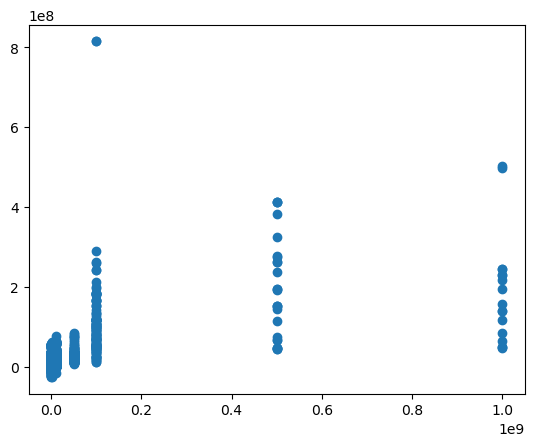

In [50]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)
plt.show()

### KNN Neighbors Regressor

In [114]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

knn = KNeighborsRegressor(n_neighbors=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [115]:
y_pred = knn.predict(X_test)

In [116]:
knn.score(X_train, y_train)

0.9323928743947791

In [117]:
knn.score(X_test, y_test)

0.5621445675885285

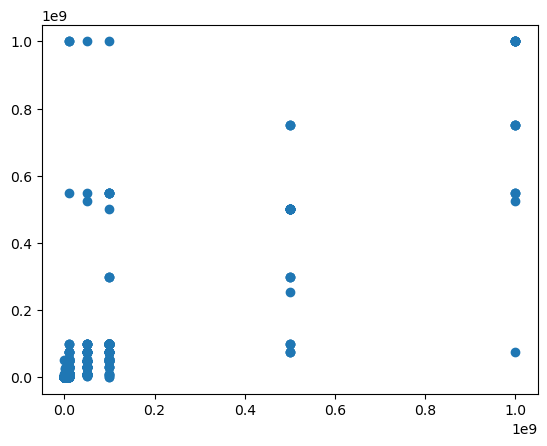

In [118]:
plt.scatter(y_test, y_pred)
plt.show()

### Gradient Boosting Regressor

In [127]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import 

reg = GradientBoostingRegressor(random_state=2, learning_rate=0.1)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=2)

In [128]:
reg.predict(X_test)

array([5.69148791e+05, 1.85854182e+08, 1.23823773e+08, ...,
       1.83624109e+07, 7.96461818e+06, 4.07949625e+07])

In [129]:
reg.score(X_train, y_train)

0.926807531475143

In [130]:
reg.score(X_test, y_test)

0.790556972086876

### DECISION TREE

In [108]:
from sklearn import tree

dct = tree.DecisionTreeRegressor(max_depth=7, criterion='squared_error', splitter='best')
dct = dct.fit(X_train, y_train)


In [109]:
y_pred2 = dct.predict(X_test)

In [110]:
dct.score(X_train, y_train)

0.8986832500170627

In [111]:
dct.score(X_test, y_test)

0.7264980345441003

In [112]:
dct.feature_importances_

array([7.15401390e-01, 4.41592297e-02, 1.20589029e-01, 0.00000000e+00,
       0.00000000e+00, 5.26953532e-02, 1.54236075e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.49013613e-05, 0.00000000e+00,
       2.42297836e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.17743627e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.61704183e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.11008812e-03,
       0.00000000e+00, 1.74487044e-02, 0.00000000e+00, 0.00000000e+00,
       8.34350841e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [ ]:
# untuk CLASSIFICATION

# cm2 = confusion_matrix(y_test, y_pred2)
# recall = cm2[0][0] / (cm2[0][0]+cm2[0][1])
# precise = cm2[0][0] / (cm2[0][0]+cm2[1][0])
# print('recall = ',recall)
# print('precise = ',precise)

In [ ]:
# untuk Classification
# tree.plot_tree(clf)

### Neural network MLPRegressor

In [104]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

mlp = MLPRegressor(solver='adam', alpha=0.001, 
                   hidden_layer_sizes=(100,), activation='identity')
mlp.fit(X_train , y_train)

MLPRegressor(activation='identity', alpha=0.001)

In [105]:
mlp.predict(X_test)
# np.array(a)

array([2.31721648e+04, 1.41447193e+08, 9.46184455e+07, ...,
       6.35336201e+06, 2.44963746e+06, 2.03573671e+07])

In [106]:
[coef.shape for coef in mlp.coefs_]

[(45, 100), (100, 1)]

In [107]:
mlp.score(X_test, y_test)

0.2785338387178806

### CLUSTERING

untuk unsupervised classification

In [ ]:
import sklearn.cluster as clt

col = df[[
#     'Reviews', 
#     'Size', 
          'Installs',
#     "Rating", 
#     'Price'
        ]]

X = col.values
y= df['Content Rating'].values

plt.scatter(X,y)
plt.ylabel('Content Rating')
plt.xlabel('Reviews')
plt.title('Content rating app based on amount of installers')
plt.show()

In [ ]:
df.head()

In [ ]:
df2 = df[['Content Rating', 'Installs']]
kmeans = clt.KMeans(n_clusters=20)
kmeans.fit(df2)

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
centroid_X = centroids[:, 0]
centroid_y = centroids[:, 1]

In [ ]:
plt.scatter(centroid_X, centroid_y, color='green', marker='X', s=200)
plt.show()

In [ ]:
label = kmeans.labels_
print(label)
# plt.scatter()

In [ ]:
# label.sum()
plt.scatter(X, y, c=label, cmap='rainbow')

In [ ]:
df.describe()